# SIR Model using `scipy`

$$ \frac{dS(t)}{dt} = - \beta S(t) I(t) $$
$$ \frac{dI(t)}{dt} = \beta S(t) I(t) - \gamma I(t) $$
$$ \frac{dR(t)}{dt} = \gamma I(y) $$

### Modules

In [14]:
# Data Wrangling
import pandas as pd    # Methods to manipulate, filter, group, and transform data
import numpy as np     # Efficient storage and computation for multi-dimensional data arrays

# Numerical Computation
from scipy.integrate import ode, solve_ivp # Ordinary diffeential equations solver

# Data Visualization 
import matplotlib.pyplot as plt # Interface for creation of publication-quality plots and figures

### Functions

In [8]:
def sir_ode(times,init,parms):
    b, g = parms
    S,I,R = init
    # ODEs
    dS = -b*S*I
    dI = b*S*I-g*I
    dR = g*I
    return [dS,dI,dR]

### Parameters

In [9]:
parms = [0.1,0.05]
init = [0.99,0.01,0]
times = np.linspace(0,200,2001)

### Solution

In [10]:
sir_sol = solve_ivp(fun=lambda t, y: sir_ode(t, y, parms), t_span=[min(times),max(times)], y0=init, t_eval=times)

sir_out = pd.DataFrame({"t":sir_sol["t"],"S":sir_sol["y"][0],"I":sir_sol["y"][1],"R":sir_sol["y"][2]})

### Visualization

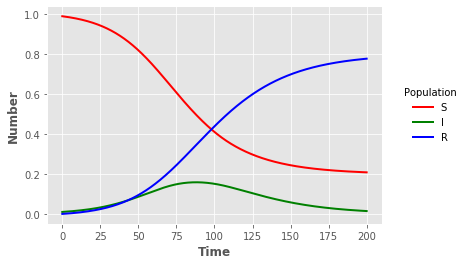

In [16]:
plt.style.use("ggplot")

sline = plt.plot("t","S","",data=sir_out,color="red",linewidth=2)
iline = plt.plot("t","I","",data=sir_out,color="green",linewidth=2)
rline = plt.plot("t","R","",data=sir_out,color="blue",linewidth=2)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)